# Master file with exp_name:

In [1]:
# import pandas library:
import os
import pandas as pd
import pylab as pyl
import numpy as np
from scipy.interpolate import *
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# pretty dataframe :
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
# Control variables: 


# master dataset location:
master_location = 'Dropbox/gits/data/ThOpt/clean_csv/'

# master file name : 
#file_name = 'ex4_EDData.csv'
#file_name_med = 'ex2_enDataSG_2T.csv'
#file_name_large = 'ex2_enDataSG_1T.csv'

# Functions:

In [4]:
def change_type(df, col, dtype):
    # This function change the column datatype
    # df - main data frame - type: dataframe
    # col - columns that you want to change data type - type: list
    # dtype - new column type - type: list
    # col and dtype must be equal in length

    if len(col) != len(dtype):
        print("col and dtype must be equal")
        return df
    for col,n_type in zip(col,dtype):
        df[col] = df[col].astype(n_type)

    return df

In [5]:
def find_unique_transfers(df, 
                          args = ['file_size','number_of_files','bandwidth','rtt','buffer_size']):
    # find unique transfers:
    # df - main dataframe
    # args - list of columns you want for uniqueness

    # get the unique transfers : as tuple 
    transfer_requests = df[args]
    droped_duplicate_trans_req = transfer_requests.drop_duplicates()

    unique_transfers = [tuple(transfers) for transfers in droped_duplicate_trans_req.values]
    return unique_transfers

In [6]:
def plot_runs_1D(df, bk_tr, runs,colors,sort_order):
    # This function plots runs
    # df - main dataframe, type: dataframe
    # bk_tr - background traffic type
    # runs - list of runs you want to plot, type: List
    # colors - list of colors for the graphs
    # length of colors must be equal to (bk_tr X runs)
    # sort_order - order of params, type: list. (for example 'p-cc-pp','pp-cc-p')
    # 
    
    if len(colors) != (len(bk_tr) * len(runs)) :
        print("length of colors must be equal to (bk_tr X runs)")
        return
    
    
    plt.figure(figsize=(35,13))
    
    df = df.sort(sort_order)
    x_label = 'Parameter order - ' + sort_order[0] +', '+ sort_order[1] + ', ' + sort_order[2]
    plt.xlabel(x_label, fontsize=40)
    plt.ylabel('Throughput (Gbps)', fontsize=40)
    title = 'Throughput Trajectory(4) - Parameter order - '+ sort_order[0] +', '+ sort_order[1] + ', ' + sort_order[2]
    plt.title(title, fontsize=50)

    #df = df.sort(['cc','p','pp'])
    color_count = 0
    for bk in bk_tr:
        bk_data = df[df.background == bk]
        for run in runs:
            run_data = bk_data[bk_data.run_id == run]
            num_rows = run_data.shape[0]
            #df_list.append(run_data)
            run_data['ticks'] = run_data[sort_order[0]].astype(str) + '-' \
                                + run_data[sort_order[1]].astype(str) + '-' \
                                + run_data[sort_order[2]].astype(str)


            x_value = np.arange(1,num_rows+1)
            x_value
            y_value = np.array(run_data.throughput)
            y_value.shape
            tick_value = np.array(run_data.ticks)

            plt.xticks(x_value[0:(num_rows+1):32], tick_value[0:(num_rows+1):32])
            plt.tick_params(axis='both', which='major', labelsize=30)

            plt.plot(x_value, y_value,colors[color_count],)
            color_count = color_count + 1
    plt.show()

In [ ]:
error_rate = []

# Read and merge data files:

In [7]:
!ls ~/Dropbox/gits/data/ThOpt/clean_csv/

ex1_sg0.25-1M.csv   ex1_sg5-25M.csv     ex2_enDataSb_1T.csv ex4_EDData.csv
ex1_sg100M.csv      ex2_enDataSG.csv    ex3_SBData.csv
ex1_sg1G.csv        ex2_enDataSG_1T.csv ex3_SGData.csv
ex1_sg3G.csv        ex2_enDataSG_2T.csv ex4_BTData.csv


In [8]:
# required values :

# OS file seperator: 
file_seperator = os.sep


# User OS home directory:
user_home = os.environ['HOME']
user_home = user_home+file_seperator
#user_home

In [9]:
log_files_path = user_home + master_location
list_of_logs = os.listdir(log_files_path)
list_of_logs

['ex1_sg0.25-1M.csv',
 'ex1_sg100M.csv',
 'ex1_sg1G.csv',
 'ex1_sg3G.csv',
 'ex1_sg5-25M.csv',
 'ex2_enDataSG.csv',
 'ex2_enDataSG_1T.csv',
 'ex2_enDataSG_2T.csv',
 'ex2_enDataSb_1T.csv',
 'ex3_SBData.csv',
 'ex3_SGData.csv',
 'ex4_BTData.csv',
 'ex4_EDData.csv']

In [10]:
file_list = []
for file_path in list_of_logs:
    print(file_path)
    url = user_home + master_location + file_path
    temp_data = pd.read_csv(url)
    
    file_list.append(temp_data)
data = pd.concat(file_list, ignore_index=True) 
data.shape

ex1_sg0.25-1M.csv
ex1_sg100M.csv
ex1_sg1G.csv
ex1_sg3G.csv
ex1_sg5-25M.csv
ex2_enDataSG.csv
ex2_enDataSG_1T.csv
ex2_enDataSG_2T.csv
ex2_enDataSb_1T.csv
ex3_SBData.csv
ex3_SGData.csv
ex4_BTData.csv
ex4_EDData.csv


(92583, 18)

In [11]:
# See all the experiments:
data.exp_name.unique()

array(['exp_1', 'exp_2_background_traffic', 'exp_3_engin', 'exp_3_kemal',
       'exp_4_BT', 'exp_4_ED'], dtype=object)

In [12]:
data["destination"] = data["destination"].replace(['Gordon/oasis','Gordon'],'Gordon/Oasis')
data.head()

,file_size,number_of_files,bandwidth,rtt,buffer_size,p,cc,pp,fast,throughput,time_needed,date,time,source,destination,run_id,background,exp_name
0,256069,1000,10000,0.04,33554432,1,1,1,1,53.622316,36.433726,11/13/14,07:36.2,Stampede,Gordon/Oasis,1,0,exp_1
1,256069,1000,10000,0.04,33554432,1,1,1,0,65.436956,29.855622,11/13/14,08:12.7,Stampede,Gordon/Oasis,1,0,exp_1
2,256069,1000,10000,0.04,33554432,1,1,2,1,94.712707,20.627214,11/13/14,08:42.5,Stampede,Gordon/Oasis,1,0,exp_1
3,256069,1000,10000,0.04,33554432,1,1,2,0,100.561361,19.427579,11/13/14,09:03.1,Stampede,Gordon/Oasis,1,0,exp_1
4,256069,1000,10000,0.04,33554432,1,1,4,1,159.132638,12.276979,11/13/14,09:22.6,Stampede,Gordon/Oasis,1,0,exp_1


In [13]:
find_unique_transfers(data)

[(256069.0, 1000.0, 10000.0, 0.040000000000000001, 33554432.0),
 (256096.0, 128.0, 10000.0, 0.040000000000000001, 33554432.0),
 (256080.0, 256.0, 10000.0, 0.040000000000000001, 33554432.0),
 (256072.0, 512.0, 10000.0, 0.040000000000000001, 33554432.0),
 (512069.0, 1000.0, 10000.0, 0.040000000000000001, 33554432.0),
 (512096.0, 128.0, 10000.0, 0.040000000000000001, 33554432.0),
 (512080.0, 256.0, 10000.0, 0.040000000000000001, 33554432.0),
 (512072.0, 512.0, 10000.0, 0.040000000000000001, 33554432.0),
 (1048641.0, 1000.0, 10000.0, 0.040000000000000001, 33554432.0),
 (1048672.0, 128.0, 10000.0, 0.040000000000000001, 33554432.0),
 (1048656.0, 256.0, 10000.0, 0.040000000000000001, 33554432.0),
 (1048640.0, 512.0, 10000.0, 0.040000000000000001, 33554432.0),
 (104857664.0, 64.0, 10000.0, 0.040000000000000001, 33554432.0),
 (1073742080.0, 16.0, 10000.0, 0.040000000000000001, 33554432.0),
 (3221225984.0, 8.0, 10000.0, 0.040000000000000001, 33554432.0),
 (5242929.0, 1000.0, 10000.0, 0.040000000

# Get exp_2 data:

In [14]:
exp_2 = data[data.exp_name == "exp_2_background_traffic"]

/Users/mds/anaconda/envs/deep_learning/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mds/anaconda/envs/deep_learning/lib/python3.6/site-packages/ipykernel/__main__.py:18: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/mds/anaconda/envs/deep_learning/lib/python3.6/site-packages/ipykernel/__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


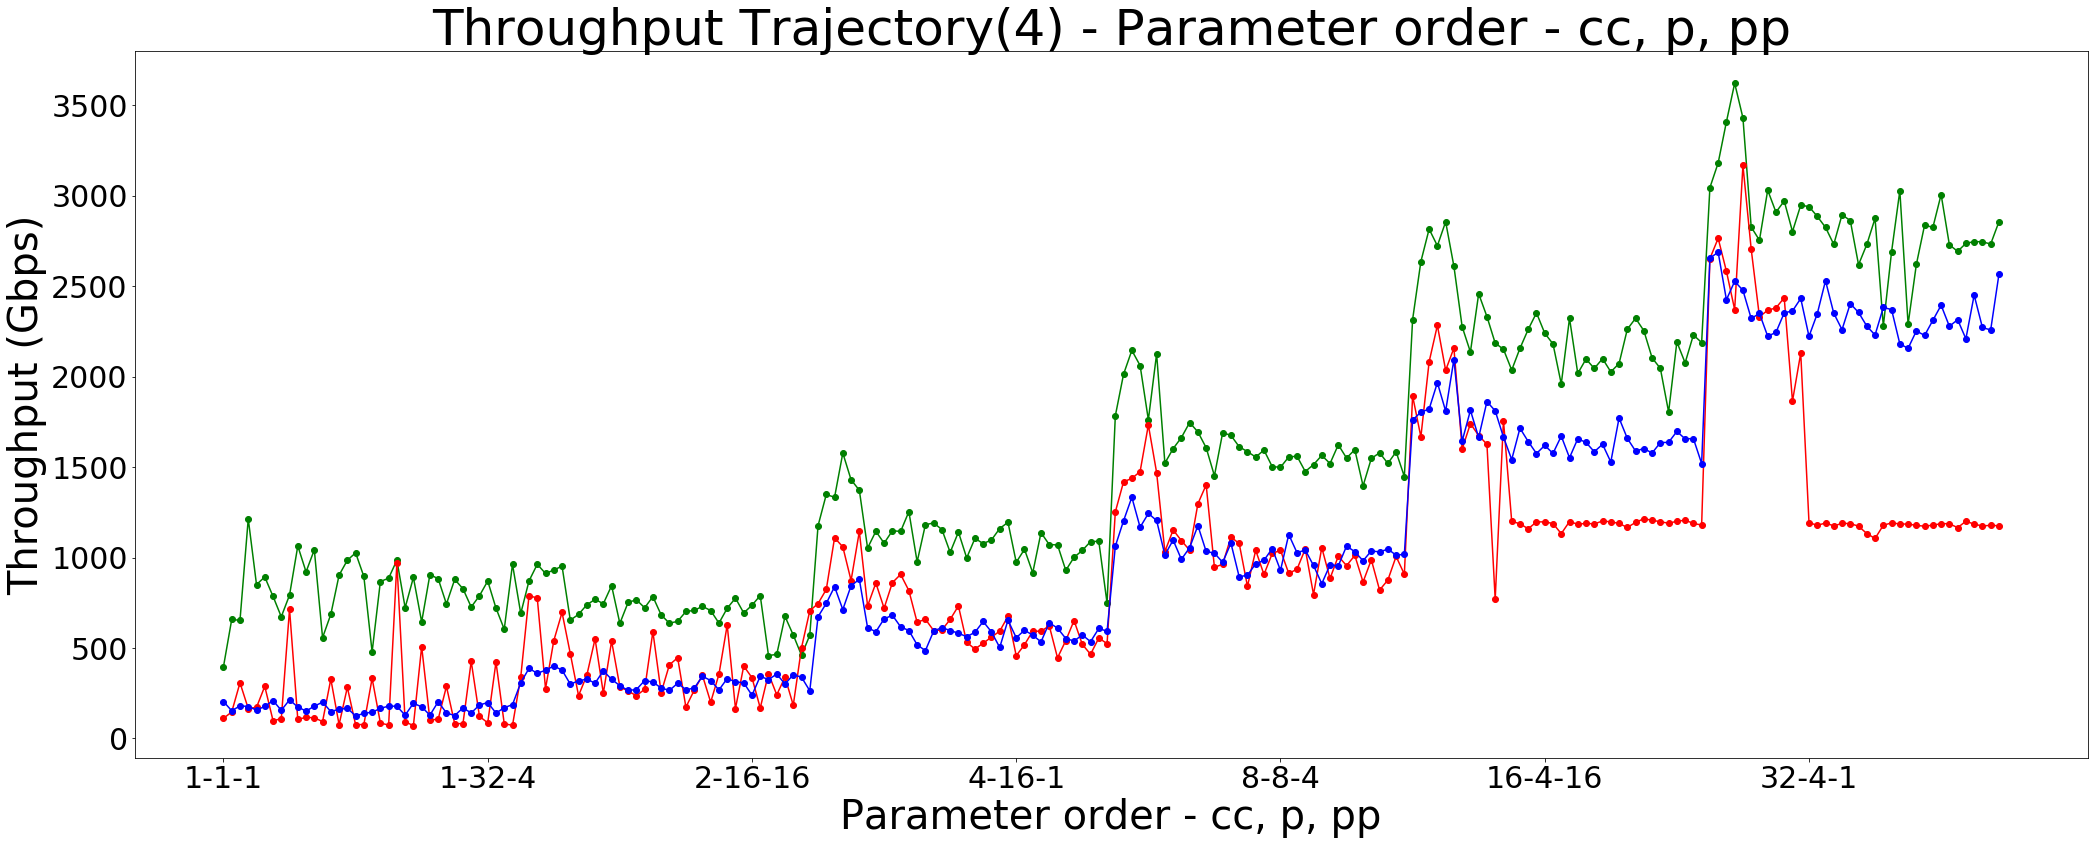

In [15]:
# get the small data and only transfer from gordon and stampede:
temp_exp2 = change_type(exp_2, ["file_size"], ["int"])
exp_2_small = temp_exp2[(temp_exp2.file_size < 10000000) & (temp_exp2.destination == 'Gordon/Oasis') ] 

bk_traffic = [0,1,2]
runs = [2]
colors = ['-go','-ro','-bo']
sort_order = ['cc','p','pp']
plot_runs_1D(exp_2_small,bk_traffic,runs,colors, sort_order)

In [19]:
data.exp_name.drop_duplicates()

0                           exp_1
64695    exp_2_background_traffic
79593                 exp_3_engin
83697                 exp_3_kemal
88017                    exp_4_BT
90393                    exp_4_ED
Name: exp_name, dtype: object

In [74]:
# Get the data for ANN :
data_ann = data[(data.exp_name == 'exp_1') & (data.fast == 1)]
data_ann.shape

(32337, 18)

In [75]:
uni_trans = find_unique_transfers(data_ann)
uni_trans

[(256069.0, 1000.0, 10000.0, 0.040000000000000001, 33554432.0),
 (256096.0, 128.0, 10000.0, 0.040000000000000001, 33554432.0),
 (256080.0, 256.0, 10000.0, 0.040000000000000001, 33554432.0),
 (256072.0, 512.0, 10000.0, 0.040000000000000001, 33554432.0),
 (512069.0, 1000.0, 10000.0, 0.040000000000000001, 33554432.0),
 (512096.0, 128.0, 10000.0, 0.040000000000000001, 33554432.0),
 (512080.0, 256.0, 10000.0, 0.040000000000000001, 33554432.0),
 (512072.0, 512.0, 10000.0, 0.040000000000000001, 33554432.0),
 (1048641.0, 1000.0, 10000.0, 0.040000000000000001, 33554432.0),
 (1048672.0, 128.0, 10000.0, 0.040000000000000001, 33554432.0),
 (1048656.0, 256.0, 10000.0, 0.040000000000000001, 33554432.0),
 (1048640.0, 512.0, 10000.0, 0.040000000000000001, 33554432.0),
 (104857664.0, 64.0, 10000.0, 0.040000000000000001, 33554432.0),
 (1073742080.0, 16.0, 10000.0, 0.040000000000000001, 33554432.0),
 (3221225984.0, 8.0, 10000.0, 0.040000000000000001, 33554432.0),
 (5242929.0, 1000.0, 10000.0, 0.040000000

In [99]:
def find_max_params(data,unique_transfers):
    max_cc = {}
    max_pp = {}
    max_p = {}
    max_th = {}
    compact = {}
    #print("unique_transfers",unique_transfers)
    data_indexed = data.set_index(['file_size','number_of_files','bandwidth','rtt','buffer_size'])
    for transfer in unique_transfers:
        #print("transfers:",transfer)
        xfer_data = data_indexed.loc[transfer]
        
        max_th[transfer] = xfer_data.throughput.max()
        
        xfer_data = xfer_data.reset_index()
        row_id = xfer_data.throughput.idxmax()
        max_cc[transfer] = xfer_data.cc[row_id]
        max_pp[transfer] = xfer_data.pp[row_id]
        max_p[transfer] = xfer_data.p[row_id]
        compact[transfer] = (xfer_data.cc[row_id],xfer_data.p[row_id],xfer_data.pp[row_id])
        
    return max_th, max_cc, max_p, max_pp, compact

In [101]:
# find optimal params for all transfer requests
max_th, max_cc, max_p, max_pp,compact = find_max_params(data_ann,uni_trans)
compact

/Users/mds/anaconda/envs/deep_learning/lib/python3.6/site-packages/ipykernel/__main__.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.


{(256069.0, 1000.0, 10000.0, 0.040000000000000001, 33554432.0): (16, 8, 32),
 (256072.0, 512.0, 10000.0, 0.040000000000000001, 33554432.0): (16, 1, 4),
 (256080.0, 256.0, 10000.0, 0.040000000000000001, 33554432.0): (32, 2, 16),
 (256096.0, 128.0, 10000.0, 0.040000000000000001, 33554432.0): (8, 2, 16),
 (512069.0, 1000.0, 10000.0, 0.040000000000000001, 33554432.0): (8, 2, 2),
 (512072.0, 512.0, 10000.0, 0.040000000000000001, 33554432.0): (4, 4, 2),
 (512080.0, 256.0, 10000.0, 0.040000000000000001, 33554432.0): (16, 1, 4),
 (512096.0, 128.0, 10000.0, 0.040000000000000001, 33554432.0): (4, 1, 32),
 (1048640.0, 512.0, 10000.0, 0.040000000000000001, 33554432.0): (8, 1, 4),
 (1048641.0, 1000.0, 10000.0, 0.040000000000000001, 33554432.0): (16, 1, 4),
 (1048656.0, 256.0, 10000.0, 0.040000000000000001, 33554432.0): (16, 1, 8),
 (1048672.0, 128.0, 10000.0, 0.040000000000000001, 33554432.0): (16, 1, 8),
 (5242929.0, 1000.0, 10000.0, 0.040000000000000001, 33554432.0): (32, 1, 2),
 (26214461.0, 200

In [133]:
labels = {(256069.0, 1000.0, 10000.0, 0.040000000000000001, 33554432.0):0,
 (256072.0, 512.0, 10000.0, 0.040000000000000001, 33554432.0):1,
 (256080.0, 256.0, 10000.0, 0.040000000000000001, 33554432.0):2,
 (256096.0, 128.0, 10000.0, 0.040000000000000001, 33554432.0):3,
 (512069.0, 1000.0, 10000.0, 0.040000000000000001, 33554432.0):3,
 (512072.0, 512.0, 10000.0, 0.040000000000000001, 33554432.0):4,
 (512080.0, 256.0, 10000.0, 0.040000000000000001, 33554432.0):1,
 (512096.0, 128.0, 10000.0, 0.040000000000000001, 33554432.0):5,
 (1048640.0, 512.0, 10000.0, 0.040000000000000001, 33554432.0):6,
 (1048641.0, 1000.0, 10000.0, 0.040000000000000001, 33554432.0):1,
 (1048656.0, 256.0, 10000.0, 0.040000000000000001, 33554432.0): 1,
 (1048672.0, 128.0, 10000.0, 0.040000000000000001, 33554432.0):1,
 (5242929.0, 1000.0, 10000.0, 0.040000000000000001, 33554432.0):7,
 (26214461.0, 200.0, 10000.0, 0.040000000000000001, 33554432.0):8,
 (104857664.0, 64.0, 10000.0, 0.040000000000000001, 33554432.0):8,
 (1073742080.0, 16.0, 10000.0, 0.040000000000000001, 33554432.0):9,
 (3221225984.0, 8.0, 10000.0, 0.040000000000000001, 33554432.0): 10}   

In [118]:
data_ann.head()

,file_size,number_of_files,bandwidth,rtt,buffer_size,p,cc,pp,fast,throughput,time_needed,date,time,source,destination,run_id,background,exp_name
0,256069,1000,10000,0.04,33554432,1,1,1,1,53.622316,36.433726,11/13/14,07:36.2,Stampede,Gordon/Oasis,1,0,exp_1
2,256069,1000,10000,0.04,33554432,1,1,2,1,94.712707,20.627214,11/13/14,08:42.5,Stampede,Gordon/Oasis,1,0,exp_1
4,256069,1000,10000,0.04,33554432,1,1,4,1,159.132638,12.276979,11/13/14,09:22.6,Stampede,Gordon/Oasis,1,0,exp_1
6,256069,1000,10000,0.04,33554432,1,1,8,1,135.107270,14.460125,11/13/14,09:47.2,Stampede,Gordon/Oasis,1,0,exp_1
8,256069,1000,10000,0.04,33554432,1,1,16,1,155.985309,12.524720,11/13/14,10:13.4,Stampede,Gordon/Oasis,1,0,exp_1


In [125]:
# Generate all the data samples:
param_list = []
for index, row in data_ann.iterrows():
    param_tuple = (row.cc,row.p,row.pp)
    param_list.append(param_tuple)
param_list = list(set(param_list))
len(param_list)

216

In [130]:
import itertools
#a = [(1,2),(4,8),(16,32)]
inputs = list(itertools.combinations(param_list,3))

In [131]:
len(inputs)

1656360

In [132]:
inputs[0]

((1, 1, 32), (1, 2, 8), (4, 2, 2))

In [135]:
number_of_datarows = len(inputs) * len(uni_trans)
number_of_datarows

28158120

In [ ]:
number_of_datarows = len(inputs) * len(uni_trans)
data_lookup = data_ann.set_index(['file_size','number_of_files','bandwidth','rtt','buffer_size','p','cc','pp'])
three_com = np.zeros((number_of_datarows, 17))
for trans, label in labels.items():
    trans_arr = np.array(trans)
    for item in inputs: 
        for param in item:
            selector = trans + param
            temp = data_loopup.loc(selector)
            

In [137]:
a = (1,2,3)
b = np.array(a)
b

array([1, 2, 3])

In [157]:
data_lookup = data_ann.set_index(['file_size','number_of_files','bandwidth','rtt','buffer_size','p','cc','pp'])
data_lookup.head()

fast  \
file_size number_of_files bandwidth rtt  buffer_size p cc pp         
256069    1000            10000     0.04 33554432    1 1  1      1   
                                                          2      1   
                                                          4      1   
                                                          8      1   
                                                          16     1   

                                                              throughput  \
file_size number_of_files bandwidth rtt  buffer_size p cc pp               
256069    1000            10000     0.04 33554432    1 1  1    53.622316   
                                                          2    94.712707   
                                                          4   159.132638   
                                                          8   135.107270   
                                                          16  155.985309   

                                                              time_needed  \
file_size number_of_files bandwidth rtt  buffer_size p cc pp                
256069    1000            10000     0.04 33554432    1 1  1     36.433726   
                                                          2     20.627214   
                                                          4     12.276979   
                                                          8     14.460125   
                                                          16    12.524720   

                                                                  date  \
file_size number_of_files bandwidth rtt  buffer_size p cc pp             
256069    1000            10000     0.04 33554432    1 1  1   11/13/14   
                                                          2   11/13/14   
                                                          4   11/13/14   
                                                          8   11/13/14   
                                                          16  11/13/14   

                                                                 time  \
file_size number_of_files bandwidth rtt  buffer_size p cc pp            
256069    1000            10000     0.04 33554432    1 1  1   07:36.2   
                                                          2   08:42.5   
                                                          4   09:22.6   
                                                          8   09:47.2   
                                                          16  10:13.4   

                                                                source  \
file_size number_of_files bandwidth rtt  buffer_size p cc pp             
256069    1000            10000     0.04 33554432    1 1  1   Stampede   
                                                          2   Stampede   
                                                          4   Stampede   
                                                          8   Stampede   
                                                          16  Stampede   

                                                               destination  \
file_size number_of_files bandwidth rtt  buffer_size p cc pp                 
256069    1000            10000     0.04 33554432    1 1  1   Gordon/Oasis   
                                                          2   Gordon/Oasis   
                                                          4   Gordon/Oasis   
                                                          8   Gordon/Oasis   
                                                          16  Gordon/Oasis   

                                                              run_id  \
file_size number_of_files bandwidth rtt  buffer_size p cc pp           
256069    1000            10000     0.04 33554432    1 1  1        1   
                                                          2        1   
                                                          4        1   
                                         

In [164]:
data_ann.file_size.dtype

dtype('int64')

In [167]:
index = (256069, 1000, 10000, 0.04, 33554432,1,1,1)
col = 'throughput'
data_lookup.get_value(index, col, takeable=False)

array([ 53.62231574,  43.18554448,  47.16296004,  54.70853713,
        44.99865507,  50.01083695,  57.27836133,  51.80117528,  50.14121588])

# Sample ANN:

In [32]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [33]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [34]:
# Print full description by running:
# print(cancer['DESCR'])
# 569 data points with 30 features
cancer['data'].shape

(569, 30)

In [35]:
X = cancer['data']
y = cancer['target']

In [103]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0,

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [38]:
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
from sklearn.neural_network import MLPClassifier

In [40]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [41]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [42]:
predictions = mlp.predict(X_test)

In [44]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.98      0.91      0.94        56
          1       0.95      0.99      0.97        87

avg / total       0.96      0.96      0.96       143



# Get all data and perform CNN:

In [16]:
temp_data = data.copy(deep=True)

In [17]:
args = ['file_size', 'number_of_files', 'bandwidth', 'rtt', 'buffer_size','source', 'destination','run_id', 'background']
unique_req = find_unique_transfers(temp_data, args)
num_reqs = len(find_unique_transfers(temp_data, args))

In [ ]:
temp_data = temp_data.set_index(args)
temp_data.head()

## Make Ndarray for CNN:

In [ ]:
# make each request a matrix of ndarray 
# with all requests make 264 * 32 * 32 matrix
m = 32
n = 32
x = num_reqs

mat = np.zeros([x,m+1,n+1])
temp_mat = np.zeros([m+1,n+1])
mat_yy = np.zeros(x)
req_count = 0
for req in unique_req:
    current_req = temp_data.loc[req]
    current_req = current_req.reset_index()
    for index, row in current_req.iterrows():
        mat[req_count, row.p, row.cc] = row.throughput
        temp_mat[row.p, row.cc] = row.throughput
        run_id = row.run_id
    mat_yy[req_count] = np.sum(temp_mat)
    #mat_y[req_count] = run_id
    req_count = req_count + 1
    

In [ ]:
mat_yy

In [ ]:
high = np.percentile(mat_yy,80)
mid_high = np.percentile(mat_yy,60)
mid = np.percentile(mat_yy,50)
low_high = np.percentile(mat_yy,40)
low = np.percentile(mat_yy,20)
#profile = [low,low_high,mid,mid_high,high]

In [ ]:
def convert_to_discrete_traffic(x,high,mid_high,mid,low_high,low):
    y = x
    count = 0
    for item in x:
        if item >= high:
            y[count] = 5
        elif (item < high) and item >=mid_high:
            y[count] = 4
        elif(item < mid_high) and (item >= mid):
            y[count] = 3
        elif(item < mid) and (item >= low_high):
            y[count] = 2
        elif(item < low_high) and (item >= low):
            y[count] = 1
        else:
            y[count] = 0
        count = count + 1
    return y

In [ ]:
mat_y = convert_to_discrete_traffic(mat_yy,high,mid_high,mid,low_high,low)
mat_y

# Core CNN code:

In [ ]:

import theano 
import warnings

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

In [ ]:
# split data for training and testing: 
training_idx = np.random.randint(mat.shape[0], size=220)
test_idx = np.random.randint(mat.shape[0], size=44)
X_train, X_test = mat[training_idx,:], mat[test_idx,:]
y_train = mat_y[training_idx]
y_test = mat_y[test_idx]

In [ ]:
X_train.shape

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 1, 33, 33)
X_test = X_test.reshape(X_test.shape[0], 1, 33, 33)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
Y_train = np_utils.to_categorical(y_train, 12)
Y_test = np_utils.to_categorical(y_test, 12)

In [ ]:
# 7. Define model architecture
model = Sequential()
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,33,33), 
                        dim_ordering='th'))
#model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(12, activation='softmax'))
model.summary()

In [ ]:
# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# 9. Fit model on training data
history = model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=30, verbose=1)

In [ ]:
history

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)

In [ ]:
score

In [ ]:
suffled_data = data.sample(frac=1)

In [ ]:
suffled_data.reset_index(drop=True)

In [ ]:
del suffled_data["run_id"]

In [ ]:
del suffled_data["fast"]

In [ ]:
suffled_data.head()

In [ ]:
suffled_data.to_csv("logs_mixed_traffic_3runs.csv",index=False)